In [1]:
import numpy as np

**Creación y manipulación de arreglos**

Cree el siguiente arreglo usando funciones de NumPy

```
[[1,  6, 11],
 [2,  7, 12],
 [3,  8, 13],
 [4,  9, 14],
 [5, 10, 15]]
```

In [2]:
display(np.arange(1,16, step=1))
np.arange(1,16).reshape(3,5).T

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

array([[ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14],
       [ 5, 10, 15]])

Considere la siguiente operación

In [3]:
numeros = range(100000) 
print(sum(numeros))

4999950000


Escriba una versión equivalente usando NumPy (bonus: compare los tiempos de cómputo usando `%timeit`)

In [8]:
numeros2 = np.arange(100000)
print(np.sum(numeros2))

%timeit -n10 -r10 sum(numeros)
%timeit -n10 -r10 np.sum(numeros2)

4999950000
1.06 ms ± 81.8 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)
42 µs ± 8.03 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)


**Slicing y reducciones**

Sea el siguiente arreglo de valores numéricos

In [10]:
np.random.seed(12345)
data = np.random.randn(20, 10)

Retorne los elementos pares de la tercera fila

In [12]:
#data[2,:] con esto tenemos todos los elementos de la tercera fila
data[2,::2] # con esto tenemos todos los elementos pares de la tercera fila
data[2,1:2] # con esto tenemos todos los elementos impares de la tercera fila

array([-5.39741446e-01,  3.24894392e+00, -5.77087303e-01,  3.02613562e-01,
        9.40277775e-04])

R: [-5.39741446e-01,  3.24894392e+00, -5.77087303e-01,  3.02613562e-01, 9.40277775e-04]

Sume las columnas pares

In [18]:
#data[:,::2];
np.sum(data[:,::2], axis=0)

array([-9.61667537,  2.43997662,  4.0283355 , -6.50295515,  6.05821204])

R: array([-9.61667537,  2.43997662,  4.0283355 , -6.50295515,  6.05821204])

Encuentre el valor del máximo y su ubicación dentro de la matriz

In [24]:
print(np.amax(data, axis=None, out=None))
print(np.where(data == np.amax(data))) 

3.248943919430755
(array([2]), array([2]))


R: El valor del máximo es 3.248943919430755, está en la fila 2, columna 2

**Broadcasting**

Sea los vectores $A \in \mathbb{R}^{10}$ y $B \in \mathbb{R}^{6}$. Construya una matriz de tamaño $10 \times 6$ que contenga las diferencias cuadradas entre los elementos de $A$ y $B$. Luego encuentre el elemento de A y el elemento de B que tienen la diferencia cuadrada más grande

Prohibido usar `for`

In [25]:
np.random.seed(12345)
A = np.random.randn(10)
B = np.random.randn(6)

In [45]:
C = A.reshape(-1,1)-B.reshape(1,-1)
print(np.amax(C**2))
print(np.where(C == np.amax(C)))

10.640654970858941
(array([4]), array([1]))


R: El elemento 4 de A y el elemento 1 de B tienen una diferencia cuadrada de 10.640654970858941

**Fractal de Mandelbrot**

El [set de Mandelbrot](https://en.wikipedia.org/wiki/Mandelbrot_set) es un conjunto de números complejos para las cuales la siguiente iteración

$$
z_{i+1} = z_i^2 + c 
$$

no diverge, es decir aquellos que cumplen

$$
z_{N} < \infty
$$

Considerando $N = 1000$, calcule y muestre el fractal de Mandelbrot. A continuación se entregan instrucciones detalladas para construir el fractal

- Cree un arreglo de valores $x$ con $2000$ elementos en el rango $[-2, 1]$
- Cree un arreglo de valores $y$ con $2000$ elementos en el rango $[-1.5, 1.5]$
- Cree una grilla bidimensional en base a $x$ e $y$ usando `np.meshgrid`
- Cree una matriz de números complejos $c = x + 1j*y$
- Realice la iteración para cada elemento de la matriz partiendo con $z_{0} = 0$
- Encuentre los $z_{N}$ que no divergen usando `np.isnan()`


In [51]:
%%time
x = np.linspace(-2,1, num = 2000)
y = np.linspace(-1.5,1.5, num = 2000)
X, Y = np.meshgrid(x,y)
C = X + 1j*Y
Z = np.zeros_like(C)

for i in range(1000):
    Z = Z**2 + C
FRACTAL = np.isnan(Z)

<timed exec>:8: RuntimeWarning: overflow encountered in square
<timed exec>:8: RuntimeWarning: invalid value encountered in square


CPU times: user 13.6 s, sys: 6.1 s, total: 19.7 s
Wall time: 19.8 s


Una vez calculado puede visualizar el fractal usando:

<IPython.core.display.Javascript object>


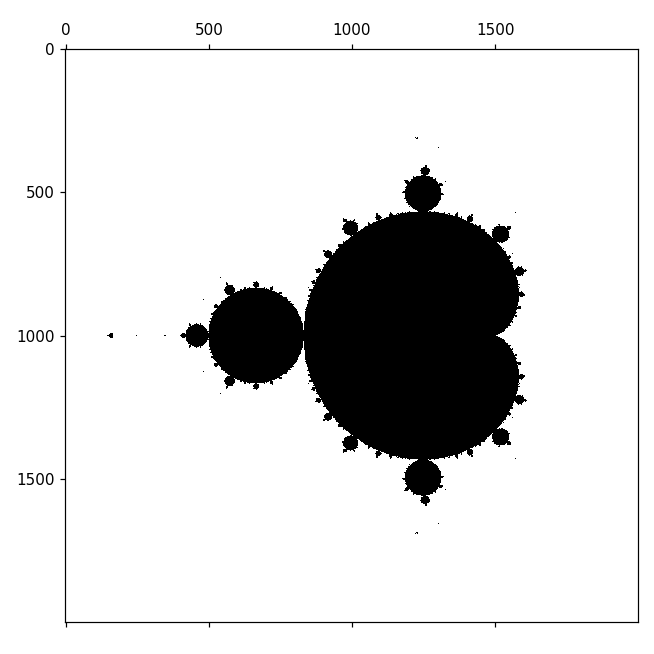

In [52]:
%matplotlib notebook
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(6, 6), tight_layout=True)
ax.matshow(FRACTAL, cmap=plt.cm.Greys_r)